In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

In [284]:
dt=pd.read_csv(r"F:\csv files\drinking_water_potability.csv")
dt.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [285]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
dt.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
90%,9.078356,236.350707,33814.935230,9.122578,385.966882,533.297241,18.504567,86.491600,4.977141,1.000000
95%,9.789819,249.609769,38474.990247,9.753101,403.070190,566.349320,19.637254,92.124059,5.220925,1.000000
99%,10.895339,278.062602,45974.106493,10.967153,434.021991,617.626558,22.090049,104.739230,5.741640,1.000000


In [286]:
dt.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


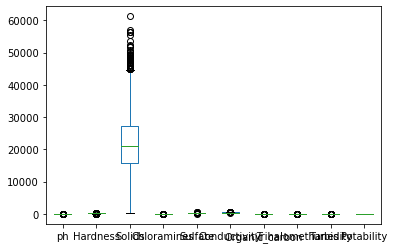

In [287]:
dt.plot(kind='box')
plt.show()

In [288]:
print("Dimensions :",dt.shape)
dt.info()

Dimensions : (3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [289]:
dt.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [290]:
dt.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [291]:
print(dt.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [292]:
order = list(np.sort(dt['Potability'].unique()))
order

[0, 1]

In [293]:
#dt.loc[dt['Potability']==0,"Potability"] = 'Not portable'
#dt.loc[dt['Potability']==1,"Potability"] = 'portable'

In [294]:
dt.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


e:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

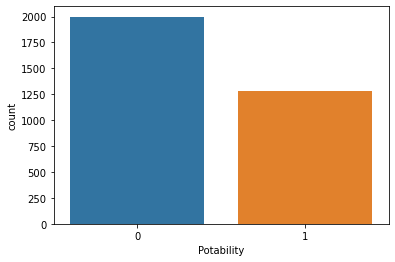

In [295]:
import seaborn as sns
sns.countplot(dt['Potability'])

In [296]:
null={}
for i in list(dt.columns):
    null[i]=dt[i].isnull().sum()
pd.DataFrame( null,index=['unique count'])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
unique count,491,0,0,0,781,0,0,162,0,0


In [297]:
dt['ph'].fillna(value=dt['ph'].median(),inplace=True)
dt['Sulfate'].fillna(value=dt['Sulfate'].median(),inplace=True)
dt['Trihalomethanes'].fillna(value=dt['Trihalomethanes'].median(),inplace=True)

In [298]:
null = {}
for i in list(dt.columns):
    null[i]=dt[i].isnull().sum()
pd.DataFrame(null,index=['unique count'])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
unique count,0,0,0,0,0,0,0,0,0,0


e:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

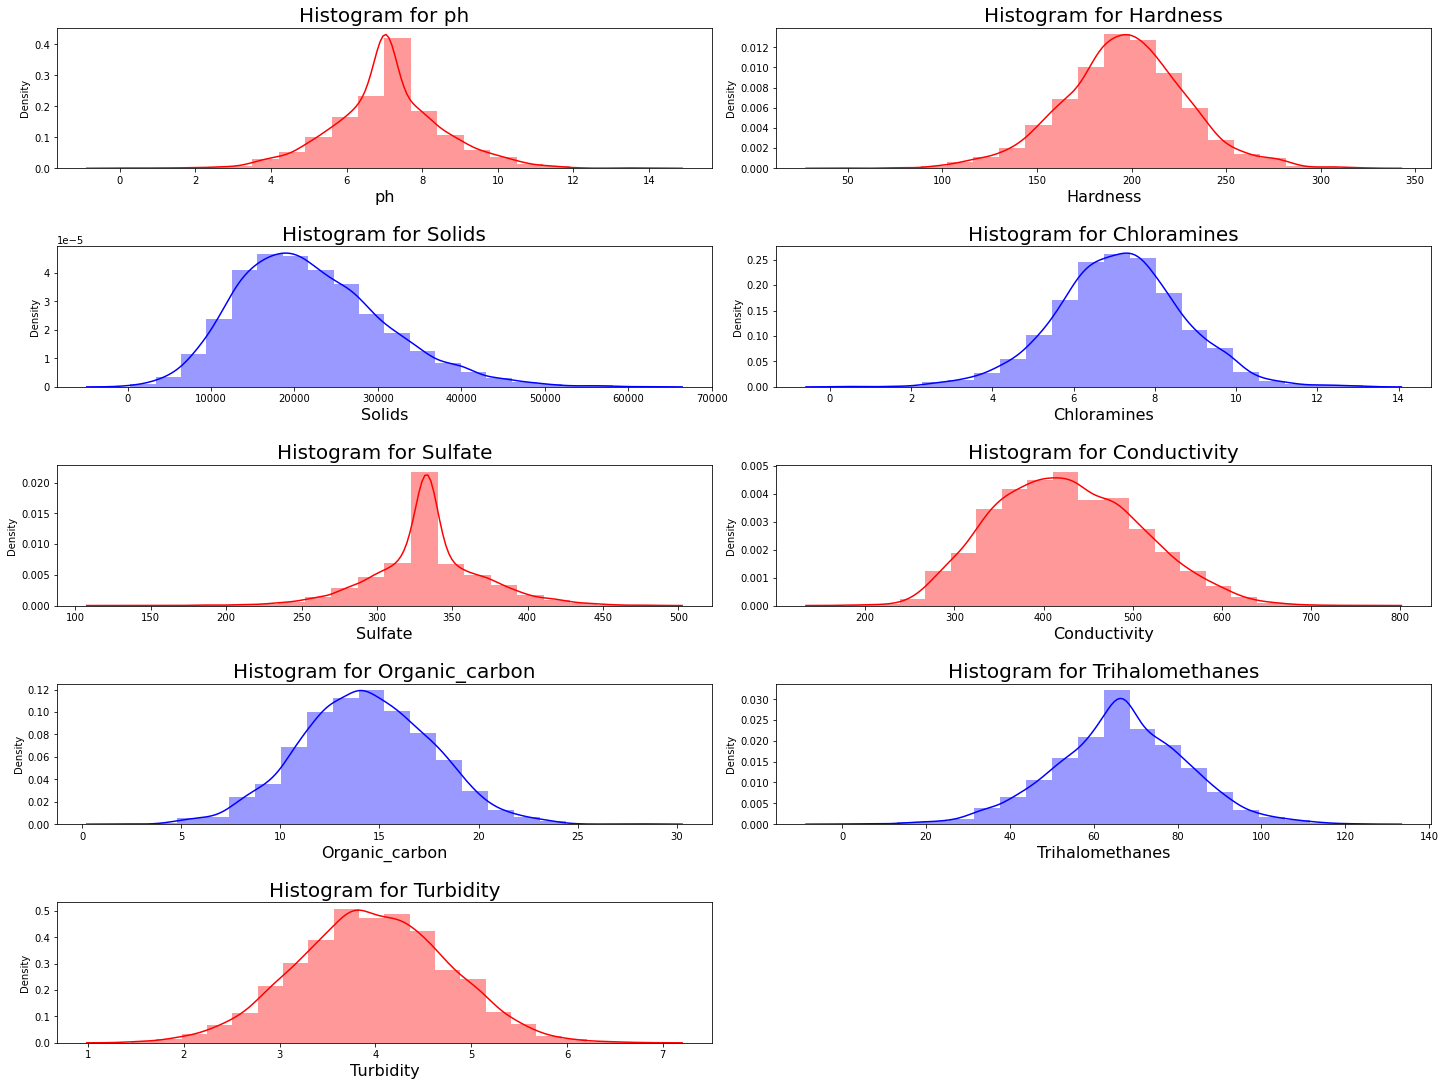

In [299]:
#KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. 
#It depicts the probability density at different values in a continuous variable
#To construct a histogram, the first step is to “bin” the range of values —
#that is, divide the entire range of values into a series of intervals — 
#and then count how many values fall into each interval
fig, ax = plt.subplots(5,2,figsize=(20, 15))


sns.distplot(dt['ph'], bins = 20, kde = True, color='red',ax=ax[0,0])
ax[0,0].set_xlabel(xlabel = 'ph', fontsize = 16)
ax[0,0].set_title(label = 'Histogram for ph', fontsize = 20)
                          
                          
sns.distplot(dt['Hardness'], bins = 20, kde = True, color='red',ax=ax[0,1])
ax[0,1].set_xlabel(xlabel = 'Hardness', fontsize = 16)
ax[0,1].set_title(label = 'Histogram for Hardness', fontsize = 20)
                          

sns.distplot(dt['Solids'], bins = 20, kde = True, color='blue',ax=ax[1,0])
ax[1,0].set_xlabel(xlabel = 'Solids', fontsize = 16)
ax[1,0].set_title(label = 'Histogram for Solids', fontsize = 20)
                          

sns.distplot(dt['Chloramines'], bins = 20, kde = True, color='blue',ax=ax[1,1])
ax[1,1].set_xlabel(xlabel = 'Chloramines', fontsize = 16)
ax[1,1].set_title(label = 'Histogram for Chloramines', fontsize = 20)
                          

sns.distplot(dt['Sulfate'], bins = 20, kde = True, color='red',ax=ax[2,0])
ax[2,0].set_xlabel(xlabel = 'Sulfate', fontsize = 16)
ax[2,0].set_title(label = 'Histogram for Sulfate', fontsize = 20)
                          

sns.distplot(dt['Conductivity'], bins = 20, kde = True, color='red',ax=ax[2,1])
ax[2,1].set_xlabel(xlabel = 'Conductivity', fontsize = 16)
ax[2,1].set_title(label = 'Histogram for Conductivity', fontsize = 20)

                          
sns.distplot(dt['Organic_carbon'], bins = 20, kde = True, color='blue',ax=ax[3,0])
ax[3,0].set_xlabel(xlabel = 'Organic_carbon', fontsize = 16)
ax[3,0].set_title(label = 'Histogram for Organic_carbon', fontsize = 20)                          
                          
sns.distplot(dt['Trihalomethanes'], bins = 20, kde = True, color='blue',ax=ax[3,1])
ax[3,1].set_xlabel(xlabel = 'Trihalomethanes', fontsize = 16)
ax[3,1].set_title(label = 'Histogram for Trihalomethanes', fontsize = 20) 
                        

sns.distplot(dt['Turbidity'], bins = 20, kde = True, color='red',ax=ax[4,0])
ax[4,0].set_xlabel(xlabel = 'Turbidity', fontsize = 16)
ax[4,0].set_title(label = 'Histogram for Turbidity', fontsize = 20) 

                                                
fig.delaxes(ax[4,1])                         
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)                          
plt.show()

In [300]:
# Here's our categorical column
print(dt['ph'].unique())
print(dt['Hardness'].unique())
print(dt['Solids'].unique())
print(dt['Trihalomethanes'].unique())

[7.0367521  3.71608007 8.09912419 ... 9.41951032 5.12676292 7.87467136]
[204.8904555 129.4229205 224.2362594 ... 175.7626463 230.6037575
 195.1022986]
[20791.31898 18630.05786 19909.54173 ... 33155.57822 11983.86938
 17404.17706]
[86.99097046 56.32907628 66.42009251 ... 69.84540029 77.4882131
 78.69844633]


In [301]:
clean_data = pd.get_dummies(dt,drop_first=True)
clean_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [302]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity',
                        'Organic_carbon','Trihalomethanes','Turbidity']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,22.809050,ph
1,30.836022,Hardness
2,6.969571,Solids
3,19.585579,Chloramines
4,56.176186,Sulfate
5,25.978811,Conductivity
6,18.695406,Organic_carbon
7,17.371757,Trihalomethanes
8,24.128751,Turbidity


In [303]:
data_no_multicolinearity = clean_data.drop(['Conductivity','Sulfate','Turbidity','Hardness'],axis=1)

In [304]:
data_no_multicolinearity.head()

,ph,Solids,Chloramines,Organic_carbon,Trihalomethanes,Potability
0,7.036752,20791.31898,7.300212,10.379783,86.990970,0
1,3.716080,18630.05786,6.635246,15.180013,56.329076,0
2,8.099124,19909.54173,9.275884,16.868637,66.420093,0
3,8.316766,22018.41744,8.059332,18.436525,100.341674,0
4,9.092223,17978.98634,6.546600,11.558279,31.997993,0


In [305]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['ph','Solids','Chloramines',
                        'Organic_carbon','Trihalomethanes']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,17.642002,ph
1,6.543978,Solids
2,15.862532,Chloramines
3,15.896729,Organic_carbon
4,15.128491,Trihalomethanes


<AxesSubplot:>

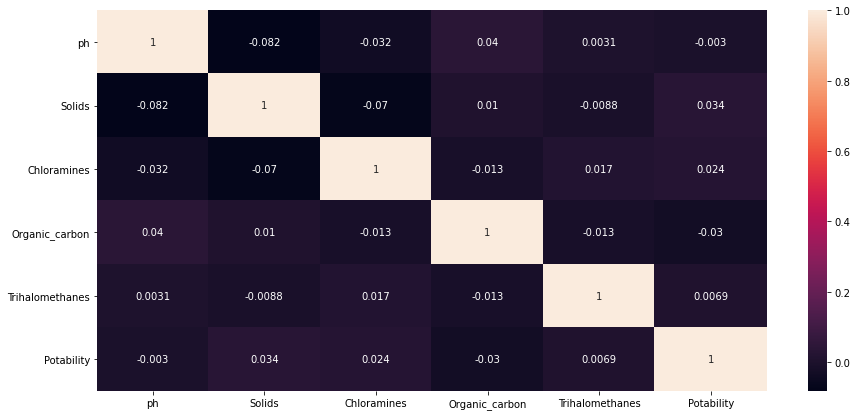

In [306]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [321]:
X=data_no_multicolinearity.drop(['Potability'],axis=1).values
y=data_no_multicolinearity['Potability'].values

In [322]:
X.shape

(3276, 5)

In [339]:
y.shape

(3276,)

In [340]:
X.shape
X.reshape(-1,1)

array([[7.03675210e+00],
       [2.07913190e+04],
       [7.30021187e+00],
       ...,
       [7.50930586e+00],
       [1.61403676e+01],
       [7.86984463e+01]])

In [353]:
from sklearn.preprocessing import scale
x_scaled = scale(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=88)
print(f"Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}\n")

Rows in train set: 2620
Rows in test set: 656



The accuracy of the Random Forests is 0.6295731707317073


<AxesSubplot:>

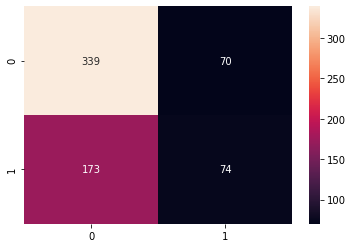

In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(y_pred,Y_test))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt='2.0f')

In [357]:
# non-linear model
from sklearn.svm import SVC

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train, y_train)

# predict
y_pred = non_linear_model.predict(x_test)

accuracy: 0.6417682926829268 



<AxesSubplot:>

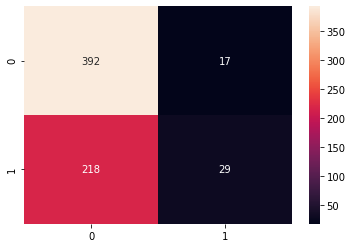

In [358]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')

In [359]:
clean_data.loc[clean_data['Potability']==0,"Potability"] = 'No'
clean_data.loc[clean_data['Potability']==1,"Potability"] = 'yes'

In [360]:
clean_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,No
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,No
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,No
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,No
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,No


In [361]:
print("score::::",model.score(x_test,y_test))

score:::: 0.6295731707317073


In [362]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [363]:
model.predict([[14.89,0.8888,7.0008,4.5555,6.0002,]])

array([1], dtype=int64)

In [364]:
import pickle
filename = 'Randomforest.PKL'
pickle.dump(model,open(filename, 'wb'))

In [365]:
import joblib
joblib.dump(model,'Randomforest.PKL')

['Randomforest.PKL']

In [366]:
loaded_model = joblib.load('Randomforest.PKL')
print('model loaded succesfully')

model loaded succesfully


In [368]:
from joblib import dump, load
import numpy as np
model = load('Randomforest.PKL') 
features = np.array([[14.7,4.8,2.9,6.7,7.9]])
model.predict(features)
if (model.predict==0):
    print("Water with these properties are not good for Drinking")
else:
    print("Water with these properties are good for Drinking ")

Water with these properties are good for Drinking 
